# **Imports and dataframe**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_september = pd.read_csv('C:/Users/Utilizador/Documents/GitHub/wild-git/Hackathon-Mano-Mano/September.csv')

C:\Users\Utilizador\anaconda3\envs\Safe space\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_september.columns

Index(['id', 'comment', 'original_comment', 'score', 'data_scale',
       'data_source', 'created_at', 'date', 'day', 'month', 'is_mf', 'device',
       'family', 'is_b2b', 'reason', 'browser', 'category', 'language',
       'platform', 'provider', 'first_order', 'nb_articles', 'csat_presales',
       'shipping_fees', 'bv_transaction', 'payment_method', 'operating_system',
       'last_paid_channel', 'has_presales_contact', 'shipping_fees_bucket',
       'bv_transaction_bucket', 'has_manodvisor_contact', 'themes', 'tags'],
      dtype='object')

In [6]:
df_heatmap = df_september.copy()
df_heatmap['is_b2b'] = df_heatmap['is_b2b'].factorize()[0]
df_heatmap = pd.get_dummies(df_heatmap, columns = ['device'])

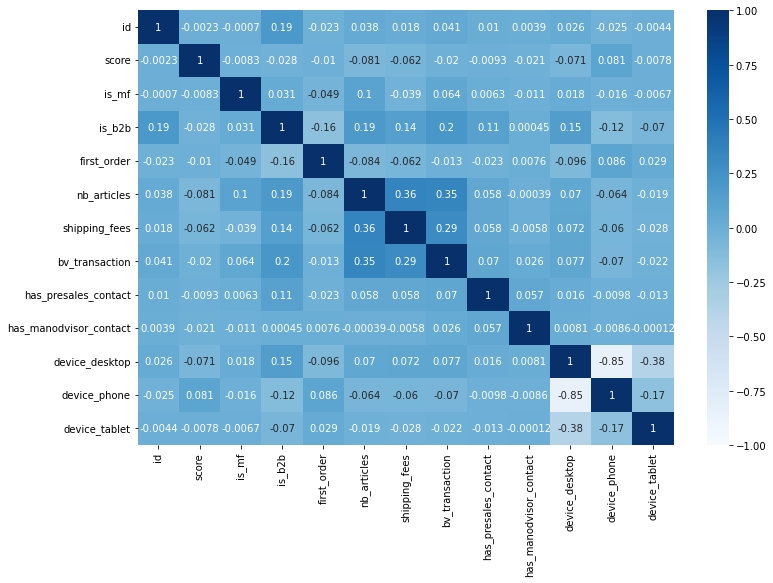

In [7]:
plt.figure(figsize =  (12,8))
sns.heatmap(df_heatmap.corr(), center = 0, vmin = -1, cmap = 'Blues', annot = True)
plt.show()

# **Data Viz**

## Most sold category/family

In [9]:
df_september['category'].value_counts(dropna = False).head()
#1 - Worskhop equipment and storage
#2 - Garden machinery
#3 - Garden furniture and toys
#4 - Heating and air conditioning
#5 - Living room furniture

Matériel et aménagement de l'atelier    1077
Outils de jardin motorisés              1032
Mobilier de jardin et jeux               898
Chauffage et climatisation               782
Meuble de salon                          665
Name: category, dtype: int64

In [10]:
df_september['family'].value_counts(dropna = False).head()
#1 - Garden and outdoor
#2 - Tools
#3 - Home and living
#4 - Heating and plumbing
#5 - Hardware

Jardin piscine          4429
Outillage               3768
Mobilier d'intérieur    2994
Plomberie chauffage     1491
Quincaillerie           1445
Name: family, dtype: int64

## Most common complaints

In [14]:
df_september['reason'].value_counts().head()
#1 - Shipping fees too expensive
#2 - Difficulty in registering/signing up
#3 - Difficulties in payment with the proposed payment methods
#4 - I couldn't easily find the products I was looking for
#5 - Ran out of options for delivery

J’ai trouvé que les frais de port étaient trop chers                    102
J’ai eu des difficultés à m'inscrire ou à me connecter                   79
J'ai eu des difficultés à payer avec les moyens de paiement proposés     61
Je n’ai pas trouvé facilement les produits que je cherchais              51
J’ai manqué d’options pour me faire livrer                               40
Name: reason, dtype: int64

In [16]:
df_september['shipping_fees'].value_counts(dropna = False).head()
#Again, most were free

0.00    10687
5.90      372
4.90      299
6.90      263
2.99      213
Name: shipping_fees, dtype: int64

# Days with most sells

In [17]:
df_september['day'].value_counts(dropna = False)

Thursday     3440
Monday       3188
Wednesday    3071
Tuesday      2956
Sunday       2702
Friday       2367
Saturday     2143
Name: day, dtype: int64

# Most common country/language/family

In [18]:
df_september['language'].value_counts(dropna = False)

Unknown       17141
French         1196
Italian         532
Spanish         455
English         377
German          164
Portuguese        2
Name: language, dtype: int64

In [33]:
df_september['comment'][df_september['language'] == 'Portuguese']

11386    4 click ed is fatta
18435     Easy and intuitive
Name: comment, dtype: object

In [20]:
df_september['platform'].value_counts(dropna = False)

FR    11864
IT     2879
ES     2285
GB     1821
DE     1018
Name: platform, dtype: int64

In [22]:
df_country = df_september[['platform', 'category', 'family']]

In [23]:
df_country[df_country['platform'] == 'FR']['family'].value_counts(dropna = False).head()

Jardin piscine          2606
Outillage               2542
Mobilier d'intérieur    1288
Quincaillerie           1083
Plomberie chauffage      981
Name: family, dtype: int64

In [24]:
df_country[df_country['platform'] == 'IT']['family'].value_counts(dropna = False).head()

Jardin piscine          598
Mobilier d'intérieur    566
Outillage               451
Electricité             245
Salle de bain, WC       239
Name: family, dtype: int64

In [25]:
df_country[df_country['platform'] == 'ES']['family'].value_counts(dropna = False).head()

Jardin piscine          512
Mobilier d'intérieur    503
Outillage               396
Luminaire               172
Quincaillerie           142
Name: family, dtype: int64

In [26]:
df_country[df_country['platform'] == 'GB']['family'].value_counts(dropna = False).head()

Mobilier d'intérieur    540
Jardin piscine          455
Salle de bain, WC       184
Outillage               163
Plomberie chauffage     158
Name: family, dtype: int64

In [27]:
df_country[df_country['platform'] == 'DE']['family'].value_counts(dropna = False).head()

Jardin piscine          258
Outillage               216
Salle de bain, WC       113
Mobilier d'intérieur     97
Plomberie chauffage      84
Name: family, dtype: int64

# Payment method / device

In [29]:
df_september['payment_method'].value_counts(dropna = False)

visa                8169
mastercard          5807
paypal              5462
oney3x               213
transfer             149
sofort                34
payment-intent        24
deferred-payment       9
Name: payment_method, dtype: int64

In [31]:
df_september['device'].value_counts(dropna = True)

desktop    13141
phone       5327
tablet      1399
Name: device, dtype: int64

In [32]:
df_september['browser'].value_counts(dropna = False)

Chrome 93.0.4577           5187
Chrome Mobile 93.0.4577    1935
Edge 93.0.961              1361
Firefox 92.0               1351
Chrome 92.0.4515           1092
                           ... 
Facebook 299.0.0              1
Chrome 63.0.3239              1
Samsung Internet 16.0         1
Edge 81.0.416                 1
Firefox Mobile 90.0           1
Name: browser, Length: 289, dtype: int64

# B2B, Manodviser, Mano Fullfilment

In [34]:
df_september['is_b2b'].value_counts(dropna = False)

False    17434
True      2340
NaN         93
Name: is_b2b, dtype: int64

In [35]:
df_september['has_manodvisor_contact'].value_counts(dropna = False)

False    19824
True        43
Name: has_manodvisor_contact, dtype: int64

In [37]:
df_september['is_mf'].value_counts(dropna = False)

False    18777
True      1090
Name: is_mf, dtype: int64

# Does pre-sale influence the purchase

In [38]:
df_september['has_presales_contact'].value_counts(dropna = False)

False    19712
True       155
Name: has_presales_contact, dtype: int64

In [40]:
df_september['csat_presales'].value_counts(dropna = False)

FALSE      19770
good          80
bad           10
neutral        7
Name: csat_presales, dtype: int64

In [42]:
df_presales = df_september[['comment','score','bv_transaction']][df_september['has_presales_contact'] == True]
df_presales

comment  score  bv_transaction
130                              NaN     10          895.20
139    as always very fast and easy.     10          156.10
180                              NaN      4          417.05
254                              NaN      8          239.00
263              Nothing easy to say     10           73.89
...                              ...    ...             ...
19591                            NaN      3          334.49
19737                            NaN     10         1186.48
19762                            NaN      3         1063.87
19814                            NaN      9          453.31
19862                            NaN     10          119.99

[155 rows x 3 columns]

In [43]:
df_presales['score'].mean()

8.812903225806451

In [45]:
df_nopresales = df_september[['comment','score','bv_transaction']][df_september['has_presales_contact'] == False]

In [46]:
df_nopresales['score'].mean()

8.975750811688311

# Sales, articles and categories

In [47]:
print(df_september['bv_transaction'].quantile(q = np.arange(0.1, 1.0, 0.1)))
print('Min value of transactions:' ,df_september['bv_transaction'].quantile(q = 0))                           
print('Max value of transactions:' ,df_september['bv_transaction'].quantile(q = 1))        
print('Average value of transactions:',df_september['bv_transaction'].mean())   

0.1     17.966
0.2     26.490
0.3     35.668
0.4     47.900
0.5     61.950
0.6     81.990
0.7    111.524
0.8    159.990
0.9    261.472
Name: bv_transaction, dtype: float64
Min value of transactions: 1.89
Max value of transactions: 4492.5
Average value of transactions: 119.12212110535059


In [48]:
df_articles = df_september[['category','family','bv_transaction','nb_articles','score']]

In [49]:
df_articles['nb_articles'].value_counts(dropna = False)
#Highest number of articles ordered at once was 35.

1     16470
2      2174
3       655
4       255
5       115
6        72
7        42
8        26
9        12
10       12
11       10
16        4
14        4
13        4
12        3
15        2
20        1
26        1
35        1
19        1
18        1
17        1
21        1
Name: nb_articles, dtype: int64